# Flight fare prediction

## 1) Business case

## 2) Input dataset and Domain analysis

### 2.1 Domain analysis - Analysis of the dataset's features

### 2.2 Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import datetime
import calendar

import warnings
warnings.filterwarnings("ignore")

##### 2.2 Libraries and their functionalities
1) Numpy                  - for statistical calculations like mean, median etc.,
2) Pandas                 - for dataset processing
3) Matplotlib and Seaborn - for data visualization
4) Regex                  - for handling and parsing the data
5) datetime and calendar  - for handling date parameter
6) Warnings               - to filter warning messages

### 2.3 Import the dataset

In [174]:
flight_data_eda = pd.read_excel("Flight_Fare.xlsx")
flight_data_ml = pd.read_excel("Flight_Fare.xlsx")

##### 2.3 Note

1) Two dataframes are created for easier data analysis and model creation
2) Dataframe flight_data_eda will be used for the exploratary data analysis
3) Dataframe flight_data_ml will be used for the model creation

### 2.4 View sample data

In [175]:
flight_data_eda

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


##### 2.4 Inference

1) Input dataset has 10683 rows
2) We have 11 features of which "Price" is the dependent variable

## 3) Exploratory data analysis

### 3.1 General information about the dataset

In [176]:
flight_data_eda.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10683 entries, 0 to 10682

Data columns (total 11 columns):

 #   Column           Non-Null Count  Dtype 

---  ------           --------------  ----- 

 0   Airline          10683 non-null  object

 1   Date_of_Journey  10683 non-null  object

 2   Source           10683 non-null  object

 3   Destination      10683 non-null  object

 4   Route            10682 non-null  object

 5   Dep_Time         10683 non-null  object

 6   Arrival_Time     10683 non-null  object

 7   Duration         10683 non-null  object

 8   Total_Stops      10682 non-null  object

 9   Additional_Info  10683 non-null  object

 10  Price            10683 non-null  int64 

dtypes: int64(1), object(10)

memory usage: 918.2+ KB


##### 3.1 Inference

1) All predictors are of data type "object"
2) The predicted feature is of data type "integer"
3) Predictors "Route" and "Total_Stops" has one null value each

### 3.2 Describe the dataset and it's features

#### 3.2.1 Key description\statistics of features of datatype integer

In [177]:
flight_data_eda.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


##### 3.2.1 Inference

1) All rows have non-zero price
2) Minimum price is Rs.1759/- and the maximum price is Rs.79512/-

#### 3.2.2 Key description\statistics of features of datatype object

In [178]:
flight_data_eda.describe(include="O")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


##### 3.2.2 Inference

There are
1) 12 unique Airline providers of which Jet Airways' data has 3849 rows
2) 44 unique date of journeys of which around 504 passengers flew on 18/05/2019
3) 5 unique departure cities of which Delhi has most number of data, around 4537 rows
4) 6 unique destination cities of which Cochin has the most number of data, around 4537 rows
5) 127 unique routes(1 route has null data and is not considered here).  Delhi to Cochin via Bombay(route DEL --> BOM --> COK) 
   is the most frequently used, around 2376 times
6) 222 unique departure timings and 1343 arrival timings
7) 368 unique durations of travel available of which the most frequent duration is 2h 50m
8) 4 unique total stops(1 total stop has null data and is not considered here).  Around 5625 rows of direct flight data 
   available
9) 10 unique additional info.  Around 8345 rows does not have these details captured

### 3.3 Check for duplicate data

In [179]:
flight_data_eda.duplicated().sum()

220

##### 3.3 Inference

1) There are 220 duplicate rows available.  They should be removed in the data pre-processing step

### 3.4 Data visualization and analysis

#### 3.4.1 Univariate analysis

##### 3.4.1.1 Analysis via sweetviz library

In [180]:
# Import sweetviz library
import sweetviz as sv

In [181]:
flight_data_univar_rpt = sv.analyze(flight_data_eda)

                                             |                                             | [  0%]   00:00 ->…


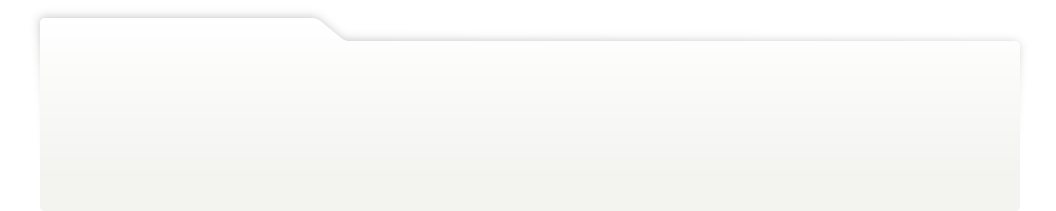
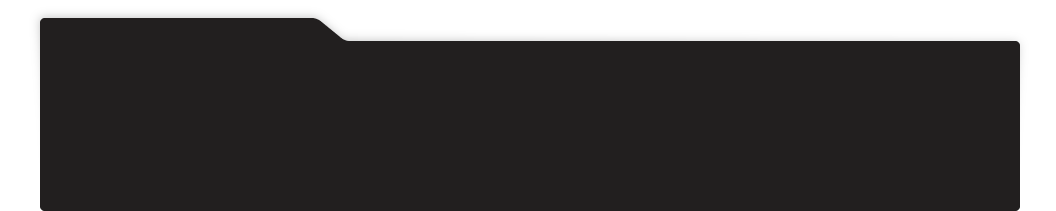
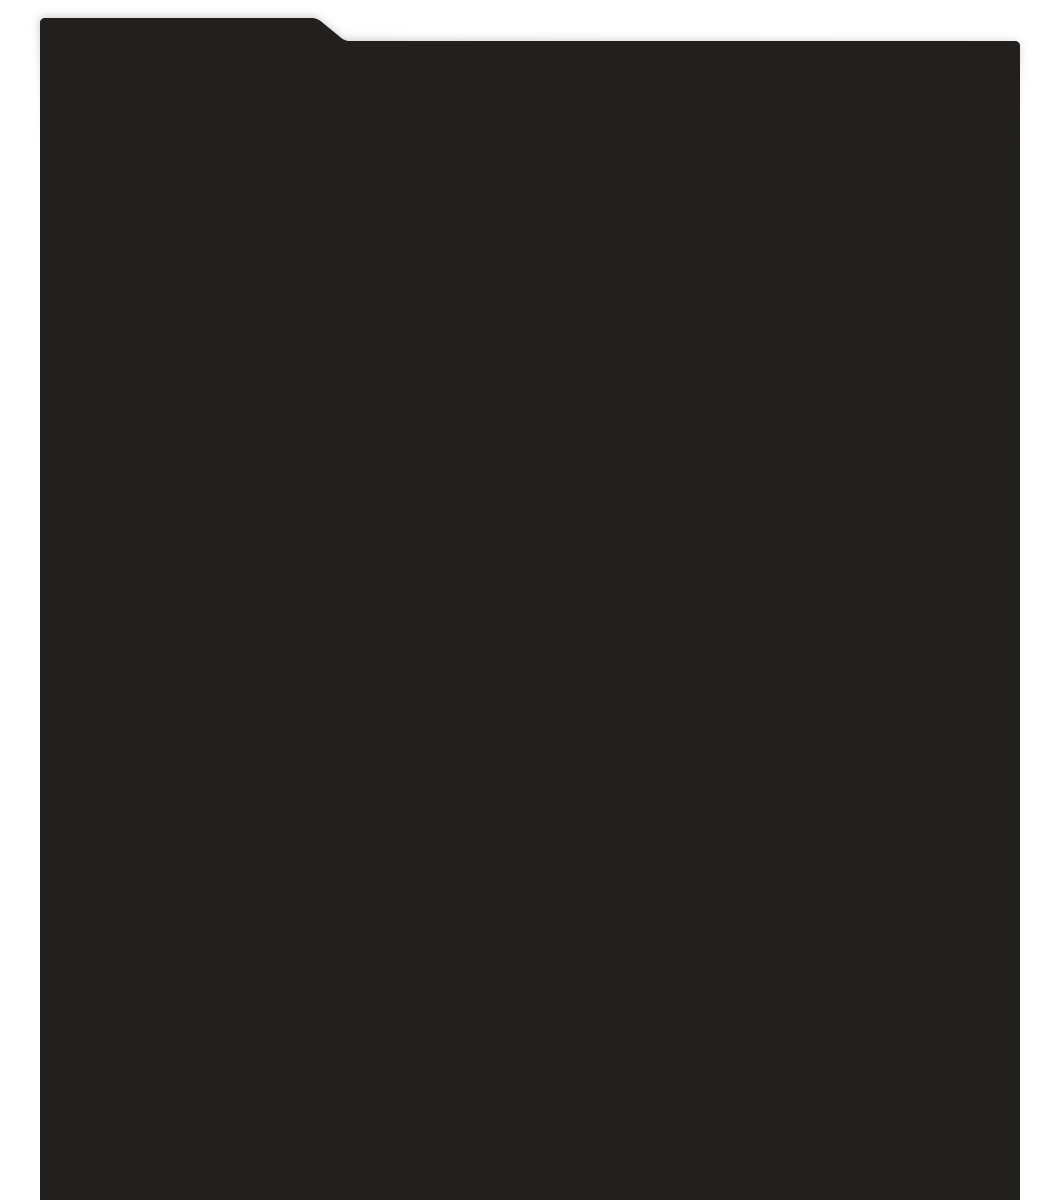
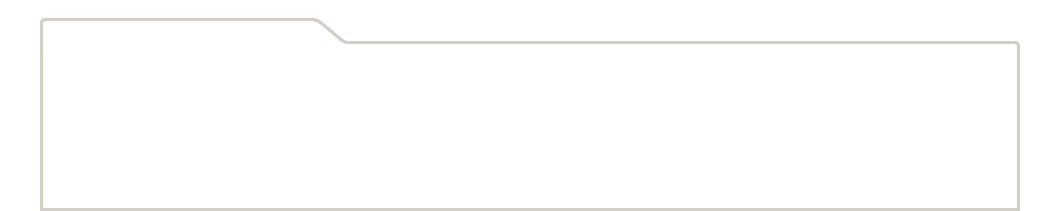
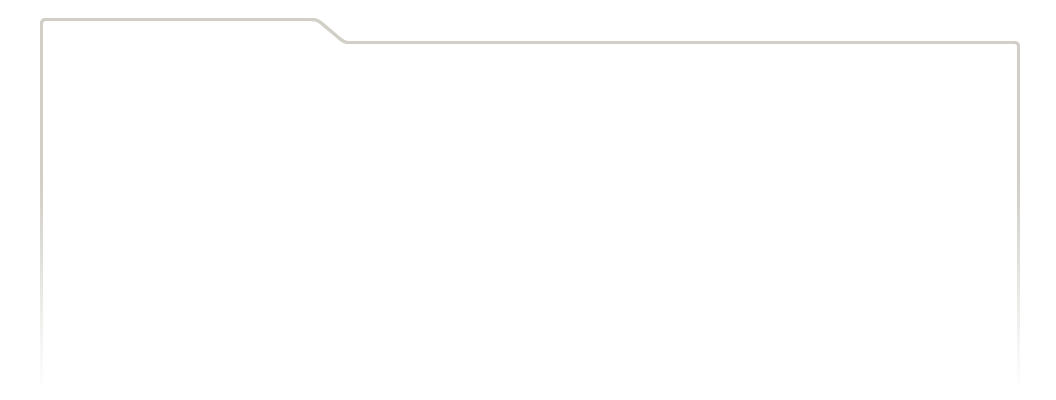
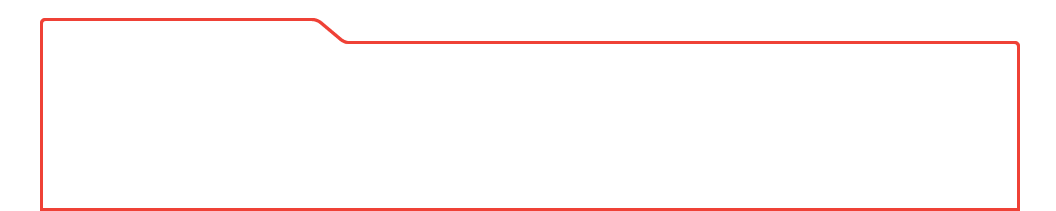
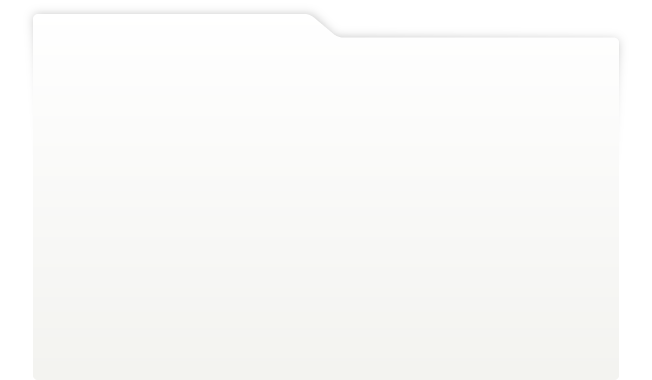
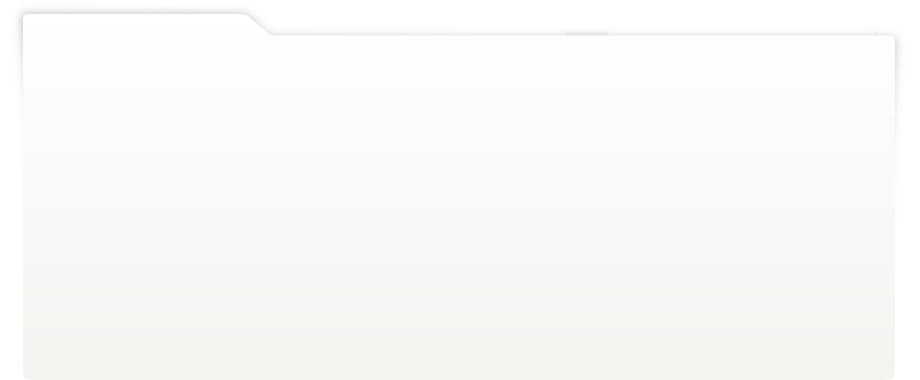
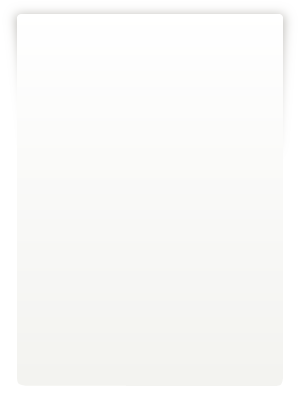
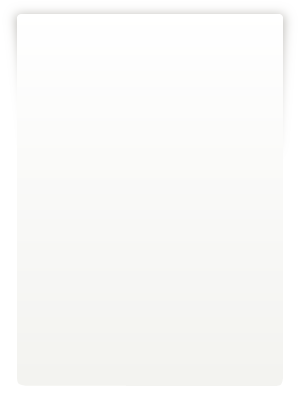
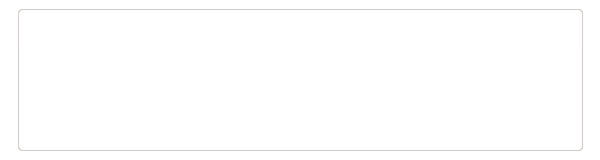
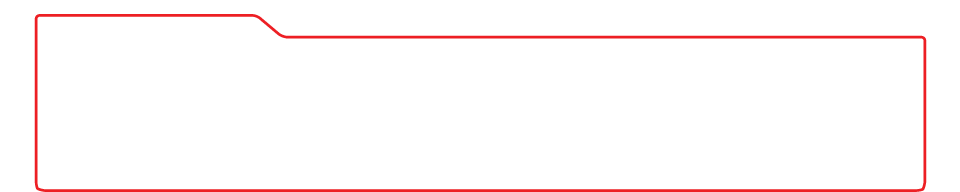
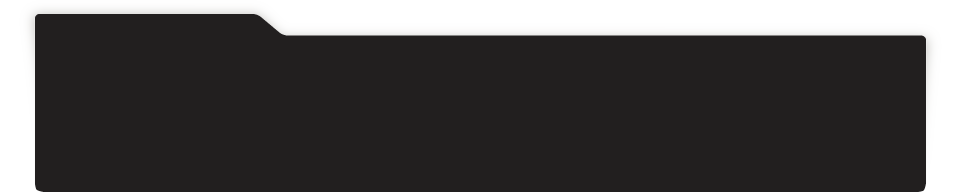
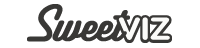
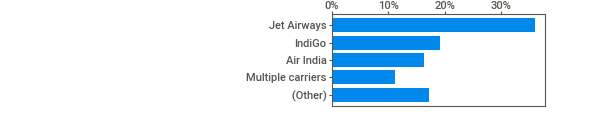
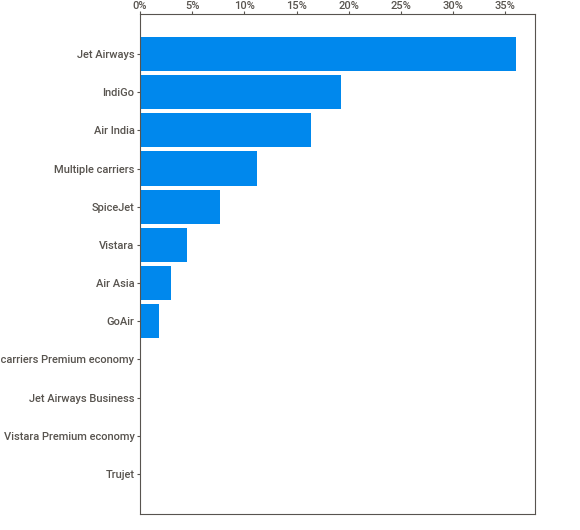
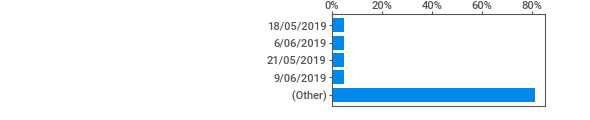
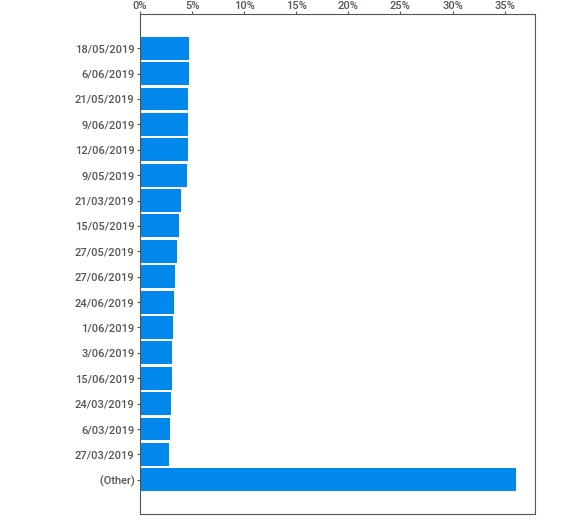
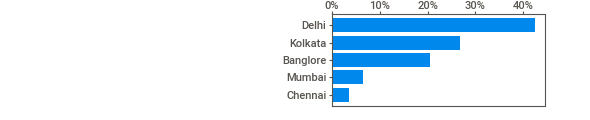
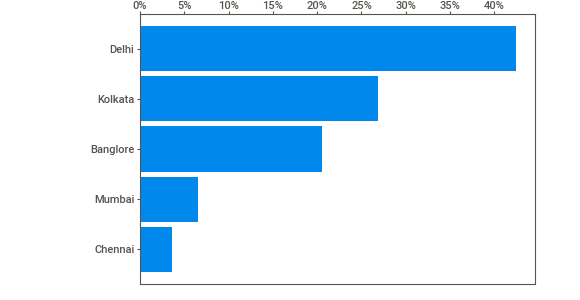
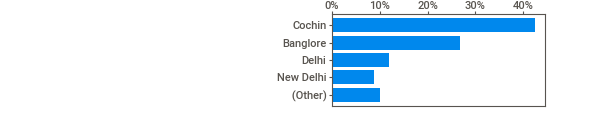
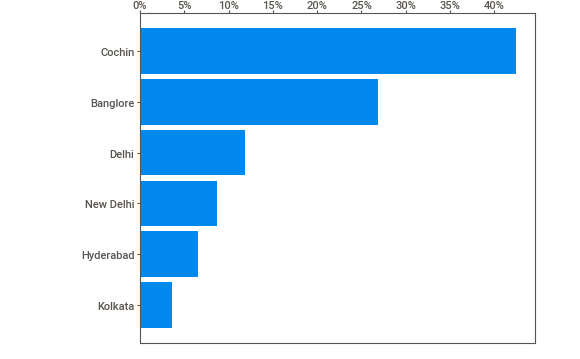
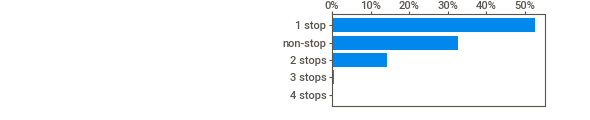
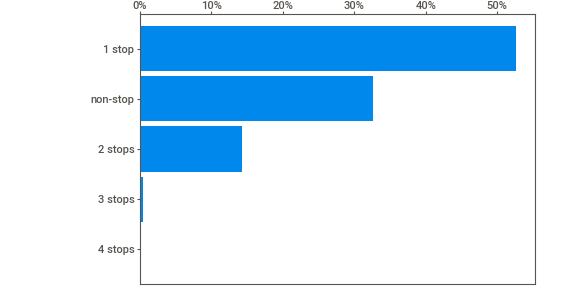
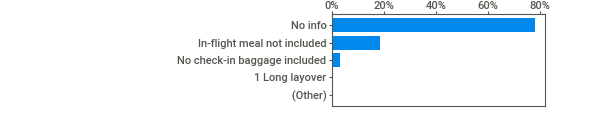
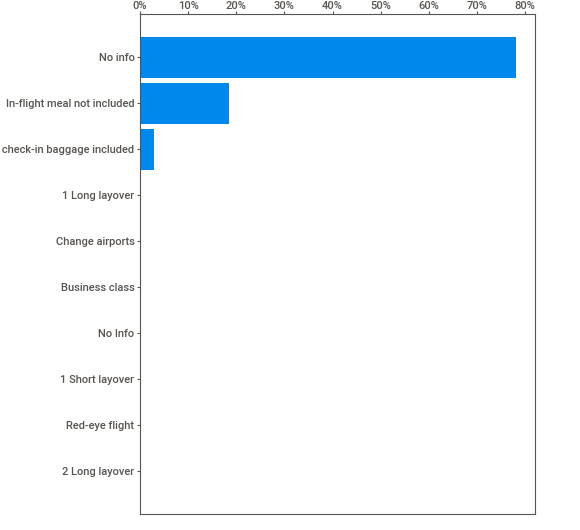
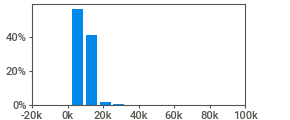
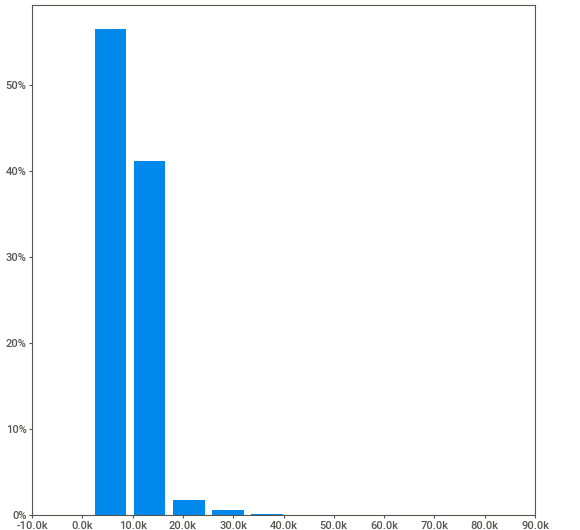
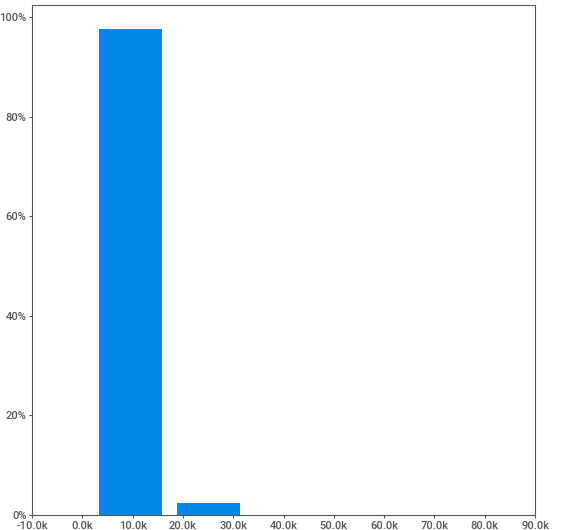
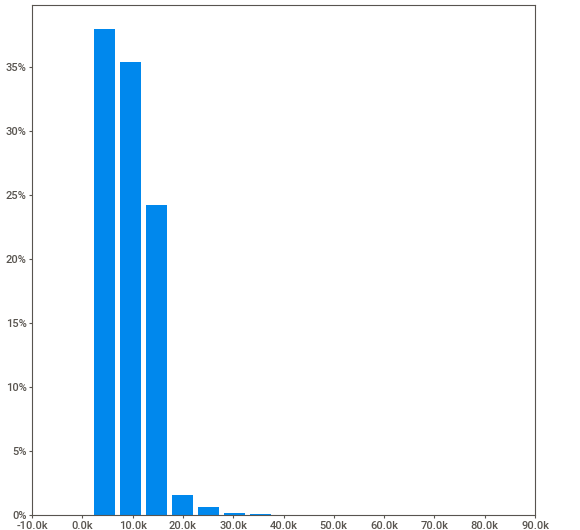
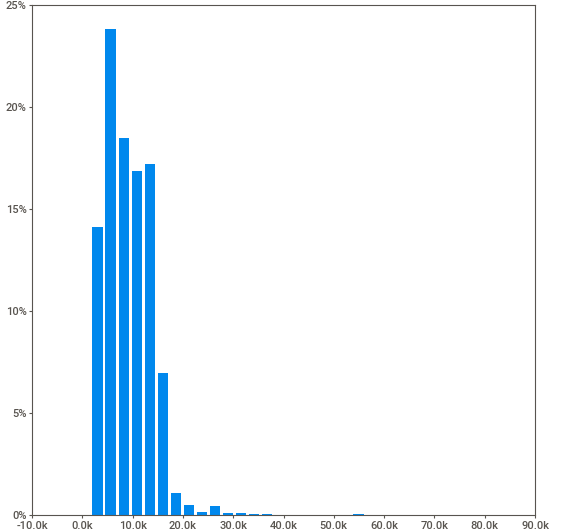
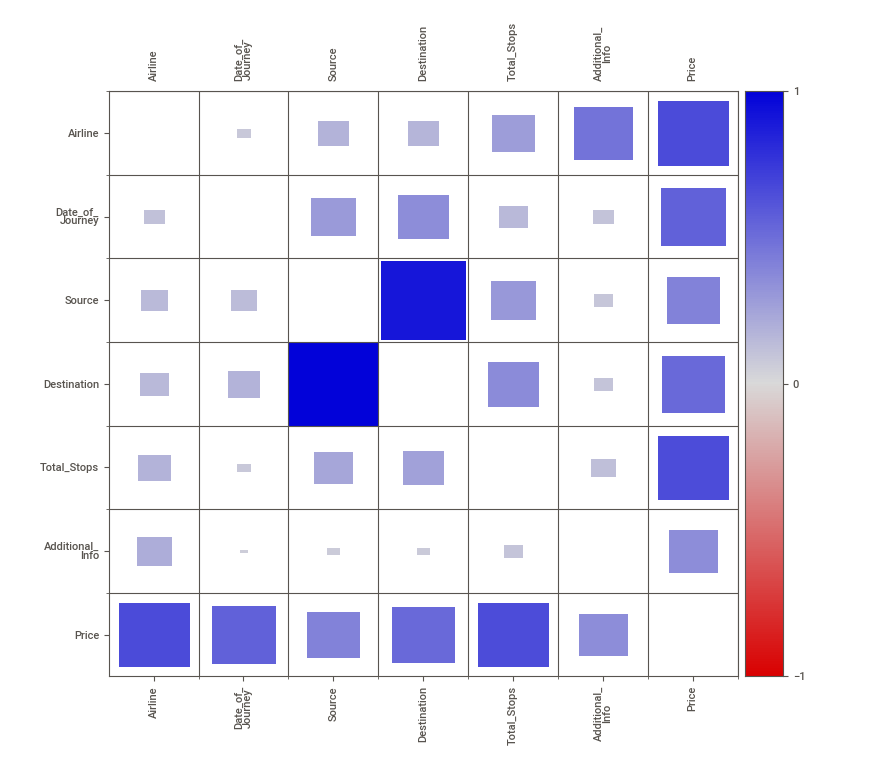
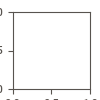

In [182]:
flight_data_univar_rpt.show_notebook()

##### 3.4.1.1 Inference

1) There are 1870 distinct flight fare(price) available
2) The data for the predicted feature follows uniform distribution and is left skewed
3) Remaining inference are already covered in section 3.2.2

##### 3.4.1.2 Top 5 Airline by count

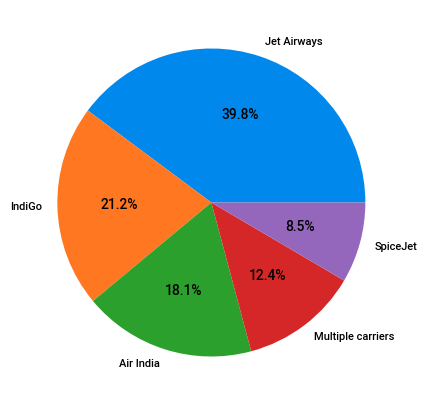

In [183]:
flight_data_eda_airline_group = flight_data_eda.groupby(flight_data_eda["Airline"]).count()
flight_data_eda_airline_group_sorted = flight_data_eda_airline_group.sort_values(by=["Source"], ascending=False)
flight_data_eda_airline_group_sorted

flight_data_eda_airline_label = []
for airline in flight_data_eda_airline_group_sorted.head(5).index:
    flight_data_eda_airline_label.append(airline)

plt.figure(figsize=(5,5))
plt.pie(flight_data_eda_airline_group_sorted["Source"].head(5), labels=flight_data_eda_airline_label, autopct="%.1f%%")
plt.show()

##### 3.4.1.2 Inference

1) Jet Airways tops the list with most number of flights operated followed by IndiGo, Air India,
   Multiple carriers(other airlines) and SpiceJet

##### 3.4.1.3 Top Departure cities by journey

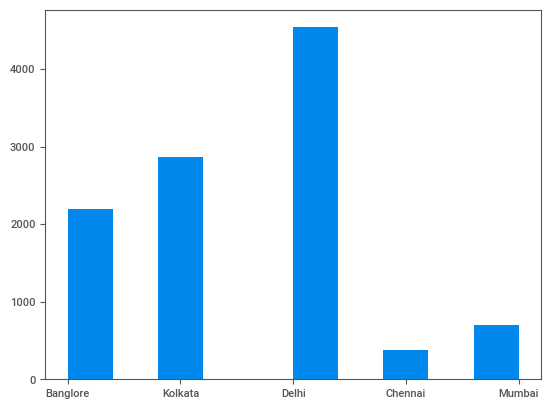

In [184]:
plt.hist(flight_data_eda["Source"])
plt.show()

##### 3.4.1.3 Inference

1) More number of flights were operated from Delhi followed by Kolkata, Bangalore, Mumbai and Chennai

##### 3.4.1.4 Top destination cities by journey

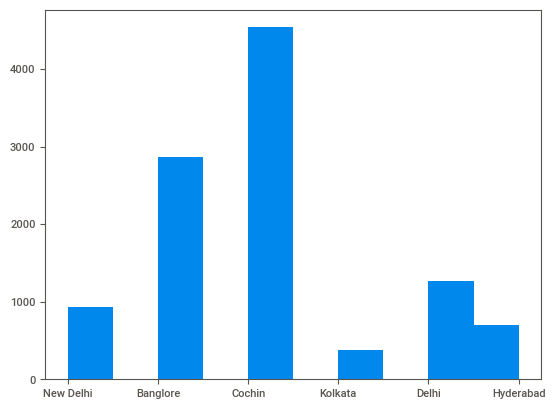

In [185]:
plt.hist(flight_data_eda["Destination"])
plt.show()

##### 3.4.1.4 Inference

1) More number of flights had their destination city as Cochin followed by Bangalore, Delhi, New Delhi, Hyderabad and Kolkata

##### 3.4.1.5 Top 5 flight routes by number of journey

In [186]:
flight_data_eda_route_group = flight_data_eda.groupby(flight_data_eda["Route"]).count()
flight_data_eda_route_group_sorted = flight_data_eda_route_group.sort_values(by=["Source"], ascending=False)
flight_data_eda_route_group_sorted.head(5)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Route,,,,,,,,,,
DEL → BOM → COK,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376
BLR → DEL,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552
CCU → BOM → BLR,979,979,979,979,979,979,979,979,979,979
CCU → BLR,724,724,724,724,724,724,724,724,724,724
BOM → HYD,621,621,621,621,621,621,621,621,621,621


##### 3.4.1.5 Inference

1) Top 5 routes that had more number of journeys are given below in the order:
    
    DEL → BOM → COK
    
    BLR → DEL
    
    CCU → BOM → BLR
    
    CCU → BLR
    
    BOM → HYD

#### 3.4.2 Bivariate analysis

##### 3.4.2.1 Duration vs Price

In [187]:
def dur_conv(duration):
    dur_split = re.split('[hm]', duration)
   
    dur_in_min = 0
    
    for dur in range(0,len(dur_split)):
        if dur_split[dur] != "":
            if dur == 0:
                dur_in_min = int(dur_split[dur]) * 60
            elif dur == 1:
                dur_in_min = dur_in_min + int(dur_split[dur])
    return dur_in_min

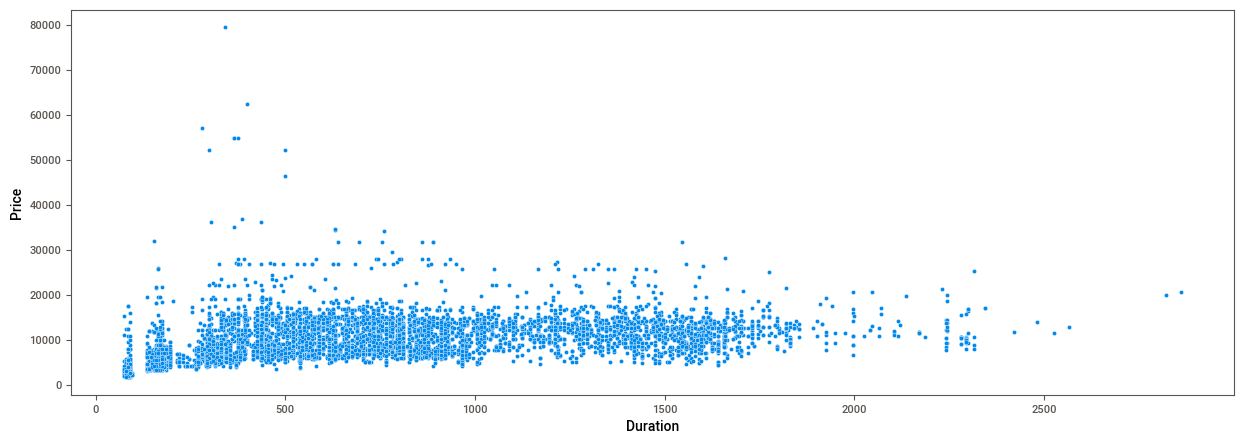

In [188]:
flight_data_eda["Duration"] = flight_data_eda["Duration"].apply(dur_conv)

plt.figure(figsize=(15,5))
sns.scatterplot(x="Duration", y="Price", data=flight_data_eda)
plt.show()

##### 3.4.2.1 Inference

1) Flights with duration more than 1750 minutes(29 hours) usually charge high airfare.  Their average airfare starts
   from Rs.7500/- whereas flights with duration lesser than 1750 minutes(29 hours) have their average airface starting from
   lesser than Rs.7500/-
2) Occassional journeys with lesser duration were charged unusually high airfare like Rs.80,000/-, Rs.60,000/- etc.,

##### 3.4.2.2 Additional info vs Price

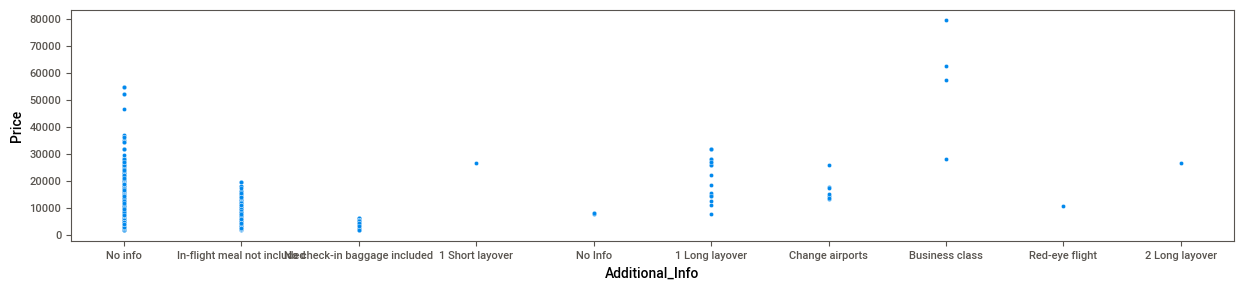

In [189]:
plt.figure(figsize=(15,3))
sns.scatterplot(x="Additional_Info", y="Price", data=flight_data_eda)
plt.show()

##### 3.4.2.2 Inference

1) Business class journeys have the highest fare charged.  Their average airfare starts from around Rs.30,000/-
2) Travellers that need to change airports are charged relatively a higher airfare when compared with others

##### 3.4.2.3 Day of Jourmey vs Price

In [190]:
def date_jour_day(date):
    day = datetime.datetime.strptime(date, '%d/%m/%Y').weekday()
    return (calendar.day_name[day])

In [191]:
flight_data_eda["Date_of_Journey"] = flight_data_eda["Date_of_Journey"].apply(date_jour_day)
flight_data_eda.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Sunday,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,Wednesday,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,Sunday,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,Sunday,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,Friday,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


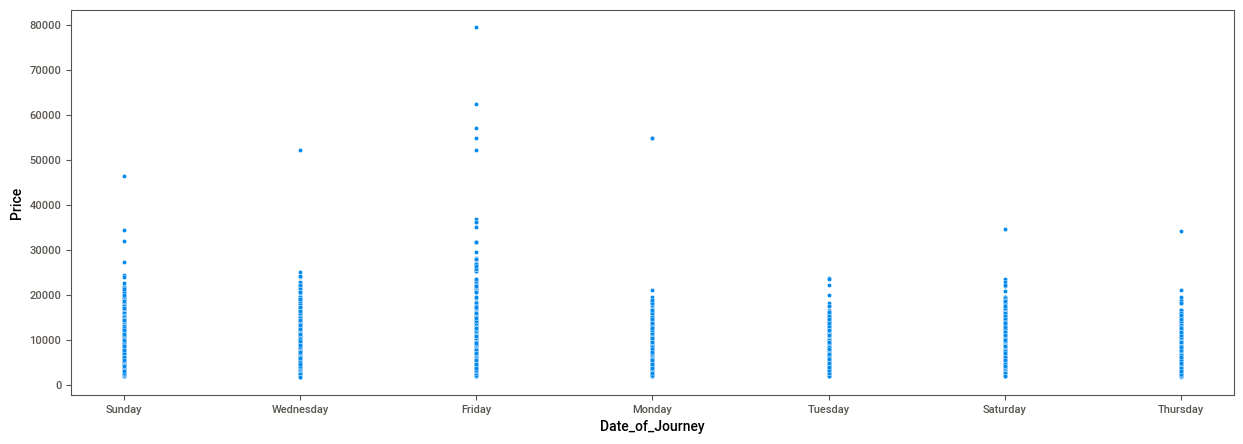

In [192]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="Date_of_Journey", y="Price", data=flight_data_eda)
plt.show()

##### 3.4.2.3 Inference

1) Flight fare is high during Friday followed by Sunday
2) There are occasional high flight fares during Monday, Wednesday, Thursday and Thursday
3) Flight fare is normal during Tuesday

## 4) Data pre-processing

### 4.1 Update the null value(based on 3.1 Inference)

In [193]:
flight_data_ml.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10683 entries, 0 to 10682

Data columns (total 11 columns):

 #   Column           Non-Null Count  Dtype 

---  ------           --------------  ----- 

 0   Airline          10683 non-null  object

 1   Date_of_Journey  10683 non-null  object

 2   Source           10683 non-null  object

 3   Destination      10683 non-null  object

 4   Route            10682 non-null  object

 5   Dep_Time         10683 non-null  object

 6   Arrival_Time     10683 non-null  object

 7   Duration         10683 non-null  object

 8   Total_Stops      10682 non-null  object

 9   Additional_Info  10683 non-null  object

 10  Price            10683 non-null  int64 

dtypes: int64(1), object(10)

memory usage: 918.2+ KB


In [194]:
flight_data_ml.loc[(flight_data_ml["Airline"]     == "Air India") &
                   (flight_data_ml["Source"]      == "Delhi") &
                   (flight_data_ml["Destination"] == "Cochin") &
                   (flight_data_ml["Dep_Time"]    == "09:45") &
                   (flight_data_ml["Duration"]    == "23h 40m") &
                   (flight_data_ml["Price"]       == 7480)]

flight_data_ml.loc[flight_data_ml["Route"].isnull() == True, "Route"] = "DEL → MAA → COK"
flight_data_ml.loc[flight_data_ml["Total_Stops"].isnull() == True, "Total_Stops"] = "1 stop"

In [195]:
flight_data_ml.loc[(flight_data_ml["Airline"]     == "Air India") &
                   (flight_data_ml["Source"]      == "Delhi") &
                   (flight_data_ml["Destination"] == "Cochin") &
                   (flight_data_ml["Dep_Time"]    == "09:45") &
                   (flight_data_ml["Duration"]    == "23h 40m") &
                   (flight_data_ml["Price"]       == 7480)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1616,Air India,24/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 25 May,23h 40m,1 stop,No info,7480
2554,Air India,15/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 16 May,23h 40m,1 stop,No info,7480
4351,Air India,27/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 28 Jun,23h 40m,1 stop,No info,7480
7896,Air India,12/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 13 Jun,23h 40m,1 stop,No info,7480
9039,Air India,6/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 07 May,23h 40m,1 stop,No info,7480


##### 4.1 Inference

1) Record with null values are updated

### 4.2 Remove the duplicate rows(based on 3.3 Inference)

In [197]:
print(flight_data_ml.duplicated().sum(), "rows of duplicate data available")
flight_data_ml[flight_data_ml.duplicated()]

220 rows of duplicate data available


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [198]:
flight_data_ml_upd = flight_data_ml.drop_duplicates()

##### 4.2 Inference

1) Duplicate rows are removed

### 4.3 Convert Total_Stops from "categorical" to "numerical"

In [199]:
def stop_conv(stop):
    if stop == "1 stop":
        stop = 1
    elif stop == "2 stops":
        stop = 2
    elif stop == "3 stops":
        stop = 3
    elif stop == "4 stops":
        stop = 4
    else:
        stop = 0
    return stop

In [200]:
flight_data_ml_upd["Total_Stops"] = flight_data_ml_upd["Total_Stops"].apply(stop_conv)
flight_data_ml_upd

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648


##### 4.2 Inference

1) The categorical values in Total_Stops feature are converted to numerical values

### 4.3 Convert duration format from hours and minutes to minutes

In [201]:
def dur_conv(duration):
    dur_split = re.split('[hm]', duration)
   
    dur_in_min = 0
    
    for dur in range(0,len(dur_split)):
        if dur_split[dur] != "":
            if dur == 0:
                dur_in_min = int(dur_split[dur]) * 60
            elif dur == 1:
                dur_in_min = dur_in_min + int(dur_split[dur])
    return dur_in_min

In [202]:
flight_data_ml_upd["Duration"] = flight_data_ml_upd["Duration"].apply(dur_conv)
flight_data_ml_upd

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,180,0,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,0,No info,12648


##### 4.3 Inference

1) Duration is conveted from hours and minutes format to minutes format

### 4.4 Convert Departure and Arrival timings to numerical values

In [203]:
def dep_time_conv(time):
    dep_time_split = re.split('[:]', time)
        
    if ((dep_time_split[0] >= "00") and (dep_time_split[0] <= "06")):
        return (1)
    elif ((dep_time_split[0] > "06") and (dep_time_split[0] <= "12")):
        return (2)
    elif ((dep_time_split[0] > "12") and (dep_time_split[0] <= "18")):
        return (3)
    elif ((dep_time_split[0] > "18") and (dep_time_split[0] <= "23")):
        return (4)

In [204]:
flight_data_ml_upd["Dep_Time"] = flight_data_ml_upd["Dep_Time"].apply(dep_time_conv)
flight_data_ml_upd["Arrival_Time"] = flight_data_ml_upd["Arrival_Time"].apply(dep_time_conv)
flight_data_ml_upd

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,4,1,170,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,1,3,445,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2,1,1140,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,3,4,325,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,3,4,285,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,4,4,150,0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,4,4,155,0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,2,2,180,0,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,2,3,160,0,No info,12648


##### 4.4 Inference

1) Departure and Arrival timings are converted to numerical values

### 4.5 Convert Date of journey from "date format" to "day" format

In [205]:
def date_jour_day(date):
    day = datetime.datetime.strptime(date, '%d/%m/%Y').weekday()
    return (calendar.day_name[day])

In [206]:
flight_data_ml_upd["Date_of_Journey"] = flight_data_ml_upd["Date_of_Journey"].apply(date_jour_day)
flight_data_ml_upd

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Sunday,Banglore,New Delhi,BLR → DEL,4,1,170,0,No info,3897
1,Air India,Wednesday,Kolkata,Banglore,CCU → IXR → BBI → BLR,1,3,445,2,No info,7662
2,Jet Airways,Sunday,Delhi,Cochin,DEL → LKO → BOM → COK,2,1,1140,2,No info,13882
3,IndiGo,Sunday,Kolkata,Banglore,CCU → NAG → BLR,3,4,325,1,No info,6218
4,IndiGo,Friday,Banglore,New Delhi,BLR → NAG → DEL,3,4,285,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Tuesday,Kolkata,Banglore,CCU → BLR,4,4,150,0,No info,4107
10679,Air India,Saturday,Kolkata,Banglore,CCU → BLR,4,4,155,0,No info,4145
10680,Jet Airways,Saturday,Banglore,Delhi,BLR → DEL,2,2,180,0,No info,7229
10681,Vistara,Friday,Banglore,New Delhi,BLR → DEL,2,3,160,0,No info,12648


##### 4.5 Inference

1) Date of journey is converted from "date" format to "day" format

### 4.6 Convert remaining "categorical" values to "numerical" values

In [207]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [208]:
flight_data_ml_upd["Airline"] = lab_enc.fit_transform(flight_data_ml_upd["Airline"])
flight_data_ml_upd["Source"] = lab_enc.fit_transform(flight_data_ml_upd["Source"])
flight_data_ml_upd["Destination"] = lab_enc.fit_transform(flight_data_ml_upd["Destination"])
flight_data_ml_upd["Route"] = lab_enc.fit_transform(flight_data_ml_upd["Route"])
flight_data_ml_upd["Additional_Info"] = lab_enc.fit_transform(flight_data_ml_upd["Additional_Info"])
flight_data_ml_upd["Date_of_Journey"] = lab_enc.fit_transform(flight_data_ml_upd["Date_of_Journey"])

In [209]:
flight_data_ml_upd.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,3,0,5,18,4,1,170,0,8,3897
1,1,6,3,0,84,1,3,445,2,8,7662
2,4,3,2,1,118,2,1,1140,2,8,13882
3,3,3,3,0,91,3,4,325,1,8,6218
4,3,0,0,5,29,3,4,285,1,8,13302


##### 4.2 Inference

1) Remaining "categorical" values are converted to "numerical" values

## 5) Dimensionality reduction

### 5.1 Split the input data into X and y

In [42]:
X = flight_data_ml_upd.drop(["Price"], axis=1)
y = flight_data_ml_upd["Price"]

##### 5.1 Inference

1) Input data is split into X and y

### 5.2 Scale the predictors/values

In [210]:
from sklearn.preprocessing import MinMaxScaler # Trying min-max instead of std scaler as all values are categorical except Price

min_max_scl = MinMaxScaler()

X_scl = min_max_scl.fit_transform(X)
X_scl = pd.DataFrame(X_scl, columns = flight_data_ml_upd.columns[0:10])

In [211]:
flight_data_ml_upd_scl = pd.concat([X_scl.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
flight_data_ml_upd_scl

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0.272727,0.500000,0.00,1.0,0.141732,1.000000,0.000000,0.034111,0.00,0.888889,3897
1,0.090909,1.000000,0.75,0.0,0.661417,0.000000,0.666667,0.132855,0.50,0.888889,7662
2,0.363636,0.500000,0.50,0.2,0.929134,0.333333,0.000000,0.382406,0.50,0.888889,13882
3,0.272727,0.500000,0.75,0.0,0.716535,0.666667,1.000000,0.089767,0.25,0.888889,6218
4,0.272727,0.000000,0.00,1.0,0.228346,0.666667,1.000000,0.075404,0.25,0.888889,13302
...,...,...,...,...,...,...,...,...,...,...,...
10458,0.000000,0.833333,0.75,0.0,0.503937,1.000000,1.000000,0.026930,0.00,0.888889,4107
10459,0.090909,0.333333,0.75,0.0,0.503937,1.000000,1.000000,0.028725,0.00,0.888889,4145
10460,0.363636,0.333333,0.00,0.4,0.141732,0.333333,0.333333,0.037702,0.00,0.888889,7229
10461,0.909091,0.000000,0.00,1.0,0.141732,0.333333,0.666667,0.030521,0.00,0.888889,12648


##### 5.2 Inference

1) The predictors are scaled as expected

### 5.3 Split the scaled values into training and testing data

In [212]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X_scl, y, test_size=0.2, random_state=9)

##### 5.3 Inference

1) Training and testing data are created

### 5.4 Feature selection

#### 5.4.1 Variance threshold method

In [213]:
from sklearn.feature_selection import VarianceThreshold as vt

var_thr = vt(threshold=0.1)
var_thr.fit(X_train)
print(var_thr.get_support())

[False  True False False False  True  True False False False]


##### 5.4.1 Inference

1) 7 features can be removed as per the output.  But, we cannot remove 7 out of 10 predictors

#### 5.4.2 Correlation coefficient method

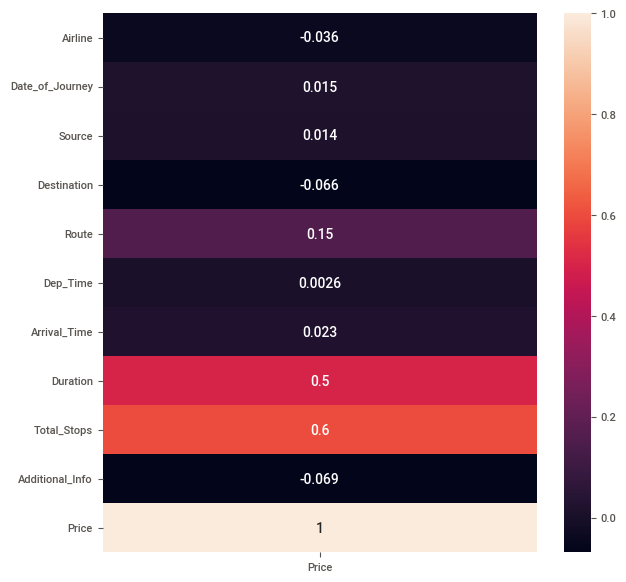

In [214]:
plt.figure(figsize=(7,7))
sns.heatmap(flight_data_ml_upd_scl.corr()[["Price"]], annot=True)
plt.show()

##### 5.4.2 Inference

1) No siginificant correlation of any predictor with the dependent variable.  We need not remove any predictor

#### 5.4.3 Duplicate features elimination method

In [215]:
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_duplicate_features

get_duplicate_features(flight_data_ml_upd_scl)

,Desc,feature1,feature2


##### 5.4.3 Inference

1) No duplicate features are present.  We need not remove any predictor

#### 5.4.4 Information gain method

In [216]:
from sklearn.feature_selection import mutual_info_regression

flight_data_ml_upd_scl_dep_list = []

for rand_stat in range(0,11):
    flight_data_ml_upd_scl_dep = mutual_info_regression(X_scl, y, random_state=rand_stat)
    flight_data_ml_upd_scl_dep_df = pd.DataFrame(flight_data_ml_upd_scl_dep, columns=['Dependence'], index=X_scl.columns)
    flight_data_ml_upd_scl_dep_df_col = flight_data_ml_upd_scl_dep_df[flight_data_ml_upd_scl_dep_df['Dependence'] == 0]
    flight_data_ml_upd_scl_dep_list.append([rand_stat, flight_data_ml_upd_scl_dep_df_col.index])

flight_data_ml_upd_scl_dep_list

[[0, Index([], dtype='object')],
 [1, Index([], dtype='object')],
 [2, Index([], dtype='object')],
 [3, Index([], dtype='object')],
 [4, Index([], dtype='object')],
 [5, Index([], dtype='object')],
 [6, Index([], dtype='object')],
 [7, Index([], dtype='object')],
 [8, Index([], dtype='object')],
 [9, Index([], dtype='object')],
 [10, Index([], dtype='object')]]

##### 5.4.4 Inference

1) No predictor should be removed

##### 5.4.5 Chi2 method is not required as the number of features are smaller

#### 5.4.6 Feature importance method

In [217]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

tb_model = SelectFromModel(RandomForestRegressor(n_estimators=20, random_state=9))
tb_model.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=20,
                                                random_state=9))

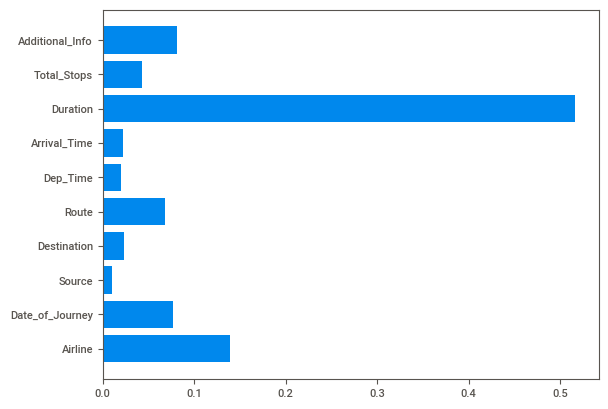

In [218]:
plt.barh(X_scl.columns, tb_model.estimator_.feature_importances_)
plt.show()

##### 5.4.6 Inference

1) Feature "Duration" alone is shows as the important feature.  Hence, we need not eliminate any predictor/feature

#### 5.4.7 PCA is not required as the number of features is too small

## 6) Model selection and creation

##### Note:

1) Distance based algorithms like Linear regression, KNN and SVM use the scaled values
2) Tree based algorithms like Decision Tree, Random Forest, Gradient boosting, Extreme gradient boosting and
   Artificial Neural Network algorithm use the actual values

#### 6.1 Import the metrics from the library

In [220]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### 6.2 Note Testing data dimensions for the calculation of adjusted r2 score

In [221]:
X_test_rows = X_test.shape[0]
X_test_cols = X_test.shape[1]

In [222]:
print(X_test.shape)
print(X_test_rows)
print(X_test_cols)

(2093, 10)

2093

10


### 6.3 Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)

r2_sco_lin_reg = r2_score(y_test, y_pred_lin_reg)
print(r2_sco_lin_reg)

adj_r2_sco_lin_reg = 1-(1-r2_sco_lin_reg)*(X_test_rows-X_test_cols)/(X_test_rows-X_test_cols-1)
print(adj_r2_sco_lin_reg)

mea_squ_err_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
print(mea_squ_err_lin_reg)

mea_abs_err_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
print(mea_abs_err_lin_reg)

0.41563436951732213

0.4153536943826043

12613482.281937586

2433.8822596831515


### 6.4 KNN

#### 6.4.1 Identify the optimum 'k' value

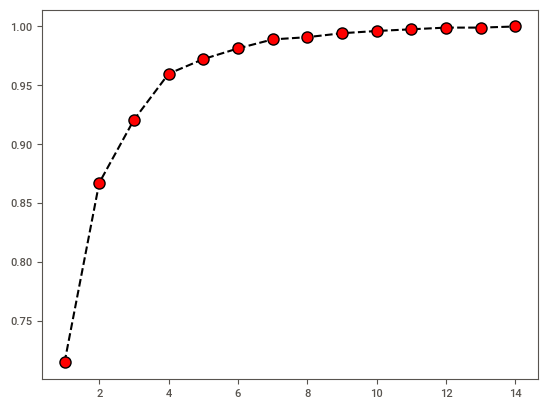

In [67]:
from sklearn.neighbors import KNeighborsRegressor

err_rate = []
for neighbor in range(1,15):
    knn_reg = KNeighborsRegressor(n_neighbors = neighbor)
    knn_reg.fit(X_train, y_train)
    y_pred_knn_reg_init = knn_reg.predict(X_test)
    err_rate.append(np.mean(y_pred_knn_reg_init != y_test))
    
plt.plot(range(1,15), err_rate, color='black', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize='8')
plt.show()

##### 6.4.1 Inference

1) The optimum value of 'k' is identified as 3

#### 6.4.2 Actual KNN model creation

In [68]:
knn_reg_final = KNeighborsRegressor(n_neighbors=3)
knn_reg_final.fit(X_train, y_train)
y_pred_knn_reg = knn_reg_final.predict(X_test)

r2_sco_knn_reg = r2_score(y_test, y_pred_knn_reg)
print(r2_sco_knn_reg)

adj_r2_sco_knn_reg = 1-(1-r2_sco_knn_reg)*(X_test_rows-X_test_cols)/(X_test_rows-X_test_cols-1)
print(adj_r2_sco_knn_reg)

mea_squ_err_knn_reg = mean_squared_error(y_test, y_pred_knn_reg)
print(mea_squ_err_knn_reg)

mea_abs_err_knn_reg = mean_absolute_error(y_test, y_pred_knn_reg)
print(mea_abs_err_knn_reg)

0.6865612308084728

0.6864106838492069

6765549.093645485

1437.6112438286352


### 6.5 SVM

#### 6.5.1 Identification of optimum hyper parameters

In [70]:
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 2],
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1]
             }

svr_hpt = SVR()
grid = GridSearchCV(svr_hpt, param_grid, refit=True, verbose=1, scoring='r2', cv=5)

grid.fit(X_scl,y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 2],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='r2', verbose=1)

In [71]:
# Best hyper parameters for SVM
print(grid.best_estimator_)

SVR(C=2, gamma=1)


##### 6.5.1 Inference

1) The optimum hyper parameters are C=2, gamma=1

#### 6.5.2 Actual SVM model creation

In [73]:
svm_reg = SVR(C=2, gamma=1)
svm_reg.fit(X_train, y_train)

y_pred_svm_reg = svm_reg.predict(X_test)

In [76]:
r2_sco_svm_reg = r2_score(y_test, y_pred_svm_reg)
print(r2_sco_svm_reg)

adj_r2_sco_svm_reg = 1-(1-r2_sco_svm_reg)*(X_test_rows-X_test_cols)/(X_test_rows-X_test_cols-1)
print(adj_r2_sco_svm_reg)

mea_squ_err_svm_reg = mean_squared_error(y_test, y_pred_svm_reg)
print(mea_squ_err_svm_reg)

mea_abs_err_svm_reg = mean_absolute_error(y_test, y_pred_svm_reg)
print(mea_abs_err_svm_reg)

0.06340841690492682

0.06295856503984754

20216249.420801226

3283.14978585977


#### 6.6 Split actual values for Tree based and Neural network algorithms

In [81]:
X_train_act, X_test_act, y_train_act, y_test_act = tts(X, y, test_size=0.2, random_state=9)

#### 6.7 Note Testing data dimensions for the calculation of adjusted r2 score

In [223]:
X_test_act_rows = X_test_act.shape[0]
X_test_act_cols = X_test_act.shape[1]

print(X_test_act_rows)
print(X_test_act_cols)

2093

10


### 6.8 Decision Tree

#### 6.8.1 Identify the optimum hyper parameters

In [82]:
from sklearn.tree import DecisionTreeRegressor
param_grid_dec_tree = {
    "criterion": ['absolute_error', 'poisson', 'friedman_mse', 'squared_error'],
    "splitter": ["best", "random"],
    "max_depth": (list(range(1,20))),
    "min_samples_split": [2,3,4,5],
    "min_samples_leaf": (list(range(1,20)))
}

dec_tree_gscv = DecisionTreeRegressor()

dec_tree_cv = GridSearchCV(dec_tree_gscv, param_grid_dec_tree, scoring='r2',
                        refit=True, verbose=1, cv=3, n_jobs=-1)

dec_tree_cv.fit(X_train_act, y_train_act) # Check if we need to use Train or actual values

print(dec_tree_cv.best_params_)
print(dec_tree_cv.best_score_)

Fitting 3 folds for each of 11552 candidates, totalling 34656 fits

{'criterion': 'squared_error', 'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}

0.7314777527673803


##### 6.8.1 Inference

1) The optimum hyper parameters are:
   criterion = squared_error, max_depth = 16, min_samples_leaf = 1, min_samples_split = 5 and splitter = random

#### 6.8.2 Actual Decision Tree model creation

In [83]:
dec_tree_best = DecisionTreeRegressor(criterion='squared_error', max_depth=16, min_samples_leaf=1,
                                       min_samples_split=5, splitter='random')
dec_tree_best.fit(X_train_act, y_train_act)

y_pred_dec_tree = dec_tree_best.predict(X_test_act)

In [84]:
r2_sco_dec_tree = r2_score(y_test_act, y_pred_dec_tree)
print(r2_sco_dec_tree)

adj_r2_sco_dec_tree = 1-(1-r2_sco_dec_tree)*(X_test_rows-X_test_cols)/(X_test_rows-X_test_cols-1)
print(adj_r2_sco_dec_tree)

mea_squ_err_dec_tree = mean_squared_error(y_test_act, y_pred_dec_tree)
print(mea_squ_err_dec_tree)

mea_abs_err_dec_tree = mean_absolute_error(y_test_act, y_pred_dec_tree)
print(mea_abs_err_dec_tree)

0.7672559370696289

0.7671441483746575

5023760.743036076

1257.6810018401907


#### 6.9 Create parameters for Randomized search CV

In [85]:
from sklearn.model_selection import RandomizedSearchCV

# Variables and values declaration for hyper parameter identification
n_estimators = [int(x) for x in np.linspace(200,2000,10)]
max_features = ["sqrt", "log2", "auto"]
max_depth = [int(y) for y in np.linspace(start=10, stop=110, num=10)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

rand_frst_parm_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'bootstrap' : bootstrap
}

### 6.10 Random Forest

#### 6.10.1 Identify the optimum hyper parameters

In [86]:
from sklearn.ensemble import RandomForestRegressor

rand_frst_rfcv = RandomForestRegressor(random_state=9)
rand_frst_cv = RandomizedSearchCV(estimator=rand_frst_rfcv, scoring='r2', param_distributions=rand_frst_parm_grid,
                                 n_iter=100, n_jobs=-1, verbose=3, cv=3, random_state=9)

rand_frst_cv.fit(X_train_act, y_train_act)
print("Best parameters for all features:", rand_frst_cv.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits

Best parameters for all features: {'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 21, 'bootstrap': False}


##### 6.10.1 Inference

1) The optimum hyper parameters are:
   n_estimators = 1200, min_samples_split = 10, min_samples_leaf = 1, max_features = sqrt,
   max_depth = 21 and bootstrap = False

#### 6.10.2 Actual Random Forest model creation

In [87]:
rand_frst_best = RandomForestRegressor(n_estimators=1200, min_samples_split=10, min_samples_leaf=1,
                                      max_features="sqrt", max_depth=21, bootstrap=False, random_state=9)

rand_frst_best.fit(X_train_act, y_train_act)

y_pred_rand_frst = rand_frst_best.predict(X_test_act)

In [90]:
r2_sco_rand_frst = r2_score(y_test_act, y_pred_rand_frst)
print(r2_sco_rand_frst)

adj_r2_sco_rand_frst = 1-(1-r2_sco_rand_frst)*(X_test_act_rows-X_test_act_cols)/(X_test_act_rows-X_test_act_cols-1)
print(adj_r2_sco_rand_frst)

mea_squ_err_rand_frst = mean_squared_error(y_test_act, y_pred_rand_frst)
print(mea_squ_err_rand_frst)

mea_abs_err_rand_frst = mean_absolute_error(y_test_act, y_pred_rand_frst)
print(mea_abs_err_rand_frst)

0.8206431433778951

0.8205569969530045

3871402.449316364

1135.5759240693915


### 6.11 Gradient Boosting

#### 6.11.1 Identify the optimum hyper parameters

In [96]:
grad_boost_param_grid = {
    'criterion': ['absolute_error', 'squared_error'],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
    'max_depth': [1,3,5,7,9],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10],
    'n_estimators': [5,50,250,500]
}

from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor()

gb_reg_cv = GridSearchCV(gb_reg, grad_boost_param_grid, verbose=2, scoring='r2', cv=5, refit=True)
gb_reg_cv.fit(X_train_act, y_train_act)

print("Best parameters:", gb_reg_cv.best_params_)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits

[CV] END criterion=absolute_error, learning_rate=0.0001, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s

[CV] END criterion=absolute_error, learning_rate=0.0001, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s

[CV] END criterion=absolute_error, learning_rate=0.0001, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s

[CV] END criterion=absolute_error, learning_rate=0.0001, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s

[CV] END criterion=absolute_error, learning_rate=0.0001, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s

[CV] END criterion=absolute_error, learning_rate=0.0001, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s

[CV] END criterion=absolute_error, learning_rate=0.

##### 6.11.1 Inference

1) The optimum hyper parameters are:
   criterion = squared_error, learning_rate = 0.1, max_depth = 5, min_samples_leaf = 2,
   min_samples_split = 10 and n_estimators = 500

#### 6.11.2 Actual Gradient Boosting model creation

In [97]:
grad_boost_best = GradientBoostingRegressor(n_estimators=500, min_samples_split=10, min_samples_leaf=2,
                                            criterion="squared_error", max_depth=5, learning_rate=0.1, random_state=9)

grad_boost_best.fit(X_train_act, y_train_act)

y_pred_grad_boost = grad_boost_best.predict(X_test_act)

In [225]:
r2_sco_grad_boost = r2_score(y_test_act, y_pred_grad_boost)
print(r2_sco_grad_boost)

adj_r2_sco_grad_boost = 1-(1-r2_sco_grad_boost)*(X_test_act_rows-X_test_act_cols)/(X_test_act_rows-X_test_act_cols-1)
print(adj_r2_sco_grad_boost)

mea_squ_err_grad_boost = mean_squared_error(y_test_act, y_pred_grad_boost)
print(mea_squ_err_grad_boost)

mea_abs_err_grad_boost = mean_absolute_error(y_test_act, y_pred_grad_boost)
print(mea_abs_err_grad_boost)

0.8363647164240848

0.8362861211870167

3532053.63631635

1130.6743707188484


### 6.12 Extreme Gradient Boosting

#### 6.12.1 Identify the optimum hyper parameters

In [108]:
xg_boost_param_grid = {'gamma': [0.1,0.5,0.7,0.9,1],
                       'learning_rate': [0.001,0.01,0.1,1],
                       'max_depth': [5,7,9],
                       'n_estimators': [5,50,150,250,500],
                       'reg_alpha': [0.1,0.5,0.7,0.9,1],
                       'reg_lambda': [0.1,0.5,0.7,0.9,1]
                      }

from xgboost import XGBRegressor

xgb_reg = XGBRegressor()

xgb_reg_cv = RandomizedSearchCV(estimator=xgb_reg, scoring='r2',param_distributions=xg_boost_param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=9, n_jobs=-1)

xgb_reg_cv.fit(X_train_act, y_train_act)

print("Best paramters:", xgb_reg_cv.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits

Best paramters: {'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 1}


##### 6.12.1 Inference

1) The optimum hyper parameters are:
   reg_lambda = 0.5, reg_alpha = 0.1, n_estimators = 250, max_depth = 5, learning_rate = 0.1 and gamma = 1

#### 6.12.2 Actual Extreme Gradient Boosting model creation

In [109]:
xgb_best = XGBRegressor(gamma=1, learning_rate=0.1, max_depth=5, n_estimators=250,
                        reg_alpha=0.1, reg_lambda=0.5, random_state=9)

xgb_best.fit(X_train_act, y_train_act)

y_pred_xg_boost = xgb_best.predict(X_test_act)

In [110]:
r2_sco_xg_boost = r2_score(y_test_act, y_pred_xg_boost)
print(r2_sco_xg_boost)

adj_r2_sco_xg_boost = 1-(1-r2_sco_xg_boost)*(X_test_act_rows-X_test_act_cols)/(X_test_act_rows-X_test_act_cols-1)
print(adj_r2_sco_xg_boost)

mea_squ_err_xg_boost = mean_squared_error(y_test_act, y_pred_xg_boost)
print(mea_squ_err_xg_boost)

mea_abs_err_xg_boost = mean_absolute_error(y_test_act, y_pred_xg_boost)
print(mea_abs_err_xg_boost)

0.823665817556753

0.8235811229446286

3806158.2850290085

1182.2931205651091


### 6.13 ANN

In [162]:
from sklearn.neural_network import MLPRegressor

ann_reg = MLPRegressor(hidden_layer_sizes=(1000,750,500,250),
                       learning_rate='adaptive',
                       learning_rate_init=0.01,
                       activation='relu',
                       max_iter=100,
                       random_state=9)
ann_reg.fit(X_train_act, y_train_act)

y_pred_ann_reg = ann_reg.predict(X_test_act)

In [163]:
r2_sco_ann_reg = r2_score(y_test_act, y_pred_ann_reg)
print(r2_sco_ann_reg)

adj_r2_sco_ann_reg = 1-(1-r2_sco_ann_reg)*(X_test_act_rows-X_test_act_cols)/(X_test_act_rows-X_test_act_cols-1)
print(adj_r2_sco_ann_reg)

mea_squ_err_ann_reg = mean_squared_error(y_test_act, y_pred_ann_reg)
print(mea_squ_err_ann_reg)

mea_abs_err_ann_reg = mean_absolute_error(y_test_act, y_pred_ann_reg)
print(mea_abs_err_ann_reg)

0.6042863658615629

0.6040963016760977

8541445.034684096

1897.8716519382854


## 7) Model evaluation and comparison

##### All models created above are compared and evaluated in this section

In [165]:
flight_fare_pred_metrics = {
    "Model": ["Liner Regression", "KNN", "SVM", "Decision Tree", "Random Forest",
              "Gradient Boosting", "Extreme Gradient Boosting", "ANN"],
    "R2 score": [r2_sco_lin_reg, r2_sco_knn_reg, r2_sco_svm_reg, r2_sco_dec_tree,
                 r2_sco_rand_frst, r2_sco_grad_boost, r2_sco_xg_boost, r2_sco_ann_reg],
    "Adj. R2 score": [adj_r2_sco_lin_reg, adj_r2_sco_knn_reg, adj_r2_sco_svm_reg, adj_r2_sco_dec_tree,
                      adj_r2_sco_rand_frst, adj_r2_sco_grad_boost, adj_r2_sco_xg_boost, adj_r2_sco_ann_reg],
    "MSE": [mea_squ_err_lin_reg, mea_squ_err_knn_reg, mea_squ_err_svm_reg, mea_squ_err_dec_tree,
            mea_squ_err_rand_frst, mea_squ_err_grad_boost, mea_squ_err_xg_boost, mea_squ_err_ann_reg], 
    "MAE": [mea_abs_err_lin_reg, mea_abs_err_knn_reg, mea_abs_err_svm_reg, mea_abs_err_dec_tree,
            mea_abs_err_rand_frst, mea_abs_err_grad_boost, mea_abs_err_xg_boost, mea_abs_err_ann_reg]
}

In [168]:
flight_fare_pred_metrics_df = pd.DataFrame(flight_fare_pred_metrics)
flight_fare_pred_metrics_df.set_index("Model", inplace=True)

##### Tabular view of the performance metrics for quicker comparison and evaluation

In [169]:
print(flight_fare_pred_metrics_df)

                           R2 score  Adj. R2 score           MSE          MAE

Model                                                                        

Liner Regression           0.415634       0.415354  1.261348e+07  2433.882260

KNN                        0.686561       0.686411  6.765549e+06  1437.611244

SVM                        0.063408       0.062959  2.021625e+07  3283.149786

Decision Tree              0.767256       0.767144  5.023761e+06  1257.681002

Random Forest              0.820643       0.820557  3.871402e+06  1135.575924

Gradient Boosting          0.836365       0.836286  3.532054e+06  1130.674371

Extreme Gradient Boosting  0.823666       0.823581  3.806158e+06  1182.293121

ANN                        0.604286       0.604096  8.541445e+06  1897.871652


## 8) Conclusion

## 9) Challenges